In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
# 1. MNIST 데이터셋 임포트

#  mnist 데이터셋은 인공지능 연구 권위자 교수가 만든 데이터셋 !!
#  Hello World 같은 존재임
mnist = tf.keras.datasets.mnist

# x_train 에는 학습시킬 데이터 
# y_train 는 학습 시킨이후 테스트 할 데이터
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

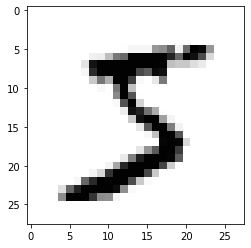

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  0  1  1  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  1  1  1  1  1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 

In [52]:
# 2.데이터 전처리
x_train ,x_test = x_train/225.0, x_test/225.0

plt.imshow(x_train[0], cmap='Greys')
plt.show()
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d  ' % i)
    sys.stdout.write('\n')


In [53]:
# 3. 모델구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 히든 레이어 활성화 함수 넬루 , 512 층
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    # output 활성화 함수 softmax 는 주로 출력층에서 사용된다.
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [54]:
# 4. 모델 컴파일 

# 최저점 w(가중치,웨이트) 을 위한 경사하강법 옵티마이저 adam
# 솔실함수
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# 5. 모델 훈련 

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1970 - accuracy: 0.9418
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0790 - accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0275 - accuracy: 0.9910


In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

# 모델 저장
model.save('Predict_Model.h5')



313/313 [==============================] - 0s 996us/step - loss: 0.0659 - accuracy: 0.9805
테스트 정확도: 0.9804999828338623


In [58]:
# loss, accuracy = [], []
# for i in range(10):
#     model.fit(x_train, y_train, epochs=1)
#     loss.append(model.evaluate(x_test, y_test)[0])
#     accuracy.append(model.evaluate(x_test, y_test)[1])

# print(accuracy)

In [60]:
from PIL import Image
import numpy as np

# 내가만든 이미지파일 오픈
# 파일을 연뒤 컨버트 (L)256 단계 흑백이미지 변환 
img = Image.open("test.png").convert("L")

# 이미지를 784 흑백 픽셀 사이즈 변환
img = np.resize(img,(1,784))


In [61]:
# 데이터를 모델에 적용할 수 있도록 가공
test_data = ((np.array(img) / 255) - 1) * -1

In [79]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
from keras.utils import np_utils

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

# test.png는 그림판에서 붓으로 숫자 8을 그린 이미지 파일
# test.png 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("test.png").convert("L")

# 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# 데이터를 모델에 적용할 수 있도록 가공
test_data = ((np.array(img) / 255) - 1) * -1

# 모델 불러오기
model = load_model('Predict_Model.h5')

# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
res = model.predict_classes(test_data)
# 2021/10/02 수정 - 오류시 아래 명령어로 대체 가능합니다.
# res =(model.predict(test_data) > 0.5).astype("int32")

print(res)

AttributeError: 'Sequential' object has no attribute 'predict_classes'